#                                                   Task 1

                        ################# Task 1 #########################

In [94]:
# Import all required libraries
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from matplotlib import pyplot as plt
import pydot
import networkx as nx

In [95]:
# Define the model and assign the nodes
chest_Model = BayesianModel([('asia','tub'),
                             ('smoke','lung'),
                             ('smoke','bronc'),
                             ('tub','either'),
                             ('lung','either'),
                             ('either','xray'),
                             ('bronc','dysp'),
                             ('either','dysp')])

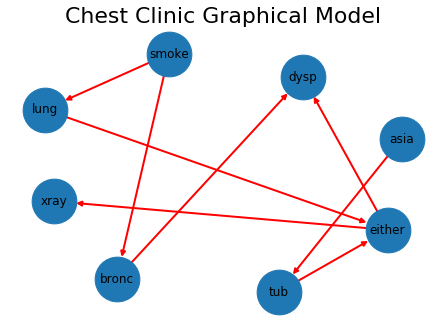

In [96]:
# Draw the chest clinic graphical model (given for the problem) and verify that it's correct 
nx.draw(chest_Model, pos=nx.spring_layout(chest_Model), with_labels=True, node_size=2000, alpha=1, edge_color='r', width=2)
plt.title('Chest Clinic Graphical Model', fontsize=22,)

plt.draw()

In [97]:
# Print the nodes in the given model
chest_Model.nodes()

NodeView(('asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp'))

In [98]:
# Print all the edges in the given model
chest_Model.edges()

OutEdgeView([('asia', 'tub'), ('tub', 'either'), ('smoke', 'lung'), ('smoke', 'bronc'), ('lung', 'either'), ('bronc', 'dysp'), ('either', 'xray'), ('either', 'dysp')])

In [99]:
# Define Parameters of conditional probaility distribution (CPD) table for each of the variables
asia_cpd = TabularCPD(variable='asia',
                      variable_card=2,
                      values=[[.01],[.99]])

tub_cpd = TabularCPD(variable='tub',
                      variable_card=2,
                      values=[[.05,.01],[.95,.99]],
                      evidence=['asia'],
                      evidence_card=[2])

smoke_cpd = TabularCPD(variable='smoke',
                       variable_card=2,
                       values=[[.5],[.5]])

lung_cpd = TabularCPD(variable='lung',
                      variable_card=2,
                      values=[[.1,.01],[.9,.99]],
                      evidence=['smoke'],
                      evidence_card=[2])

bronc_cpd = TabularCPD(variable='bronc',
                       variable_card=2,
                       values=[[.6,.3],[.4,.7]],
                       evidence=['smoke'],
                       evidence_card=[2])

either_cpd = TabularCPD(variable='either',
                      variable_card=2,
                      values=[[1,1,1,0],[0,0,0,1]],
                      evidence=['tub', 'lung'],
                      evidence_card=[2,2])

xray_cpd = TabularCPD(variable='xray',
                    variable_card=2,
                    values=[[.98,.05],[.02,.95]],
                    evidence=['either'],
                    evidence_card=[2])

dysp_cpd = TabularCPD(variable='dysp',
                    variable_card=2,
                    values=[[.9,.7,.8,.1],[.1,.3,.2,.9]],
                    evidence=['either', 'bronc',],
                    evidence_card=[2,2])

In [100]:
print(xray_cpd.cardinality)

[2 2]


In [101]:
# Add all the CPDs in the designed bayesian model and verifies that the CPDs are correctly defined and sum to 1.
chest_Model.add_cpds(asia_cpd, tub_cpd, smoke_cpd, lung_cpd, bronc_cpd, either_cpd, xray_cpd, dysp_cpd)
print("print 'True' if CPDs sum to 1 or else print 'False'")
chest_Model.check_model()

print 'True' if CPDs sum to 1 or else print 'False'


True

In [102]:
# Getting all the local independencies in the network.    
chest_Model.local_independencies(['asia', 'tub','smoke','lung', 'either', 'bronc','xray', 'dysp'])

(asia _|_ bronc, smoke, lung)
(tub _|_ bronc, smoke, lung | asia)
(smoke _|_ tub, asia)
(lung _|_ tub, asia, bronc | smoke)
(either _|_ bronc, asia, smoke | tub, lung)
(bronc _|_ tub, either, lung, asia, xray | smoke)
(xray _|_ tub, smoke, asia, dysp, lung, bronc | either)
(dysp _|_ tub, smoke, lung, asia, xray | bronc, either)

In [103]:
# Create Model Inference using Variable Elimination in pgmpy library(python) and calculate the joint probability
def VEModel(model):
    chest_inference = VariableElimination(model)
    joint_prob = chest_inference.query(variables=['tub','lung','bronc'], evidence={'asia':0,'xray':0})
    print(joint_prob)
    print()
    print("Joint probability of 'tub= yes, lung= yes, bronc= yes', given evidence that 'asia= yes, xray= yes' is:\n", joint_prob.values[0][0][0])

In [104]:
# call the function to print the joint proability of the given condition
VEModel(chest_Model)


Eliminating: smoke: 100%|██████████| 3/3 [00:00<00:00, 250.17it/s]

+---------+----------+--------+-----------------------+
| lung    | bronc    | tub    |   phi(lung,bronc,tub) |
+=========+==========+========+=======================+
| lung(0) | bronc(0) | tub(0) |                0.0106 |
+---------+----------+--------+-----------------------+
| lung(0) | bronc(0) | tub(1) |                0.2021 |
+---------+----------+--------+-----------------------+
| lung(0) | bronc(1) | tub(0) |                0.0079 |
+---------+----------+--------+-----------------------+
| lung(0) | bronc(1) | tub(1) |                0.1508 |
+---------+----------+--------+-----------------------+
| lung(1) | bronc(0) | tub(0) |                0.1413 |
+---------+----------+--------+-----------------------+
| lung(1) | bronc(0) | tub(1) |                0.1370 |
+---------+----------+--------+-----------------------+
| lung(1) | bronc(1) | tub(0) |                0.1778 |
+---------+----------+--------+-----------------------+
| lung(1) | bronc(1) | tub(1) |                0

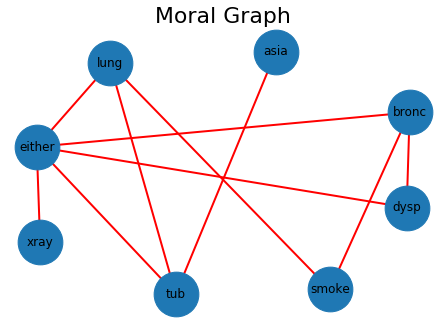

In [105]:
# Draw the moral graph of the network
moral_graph = chest_Model.to_markov_model()

nx.draw(moral_graph, with_labels=True, node_size=2000, alpha=1, edge_color='r', width=2)
plt.title('Moral Graph', fontsize=22)
plt.draw()

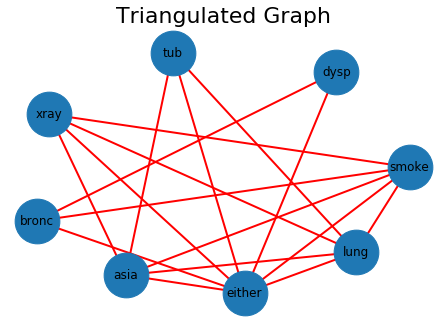

In [106]:
# Draw the triangulated graph of the network (Note: Every cycle of 4 or longer has a cord)
triangulated_graph = moral_graph.triangulate()

nx.draw(triangulated_graph, with_labels=True, node_size=2000, alpha=1, edge_color='r', width=2)
plt.title('Triangulated Graph', fontsize=22)
plt.draw()

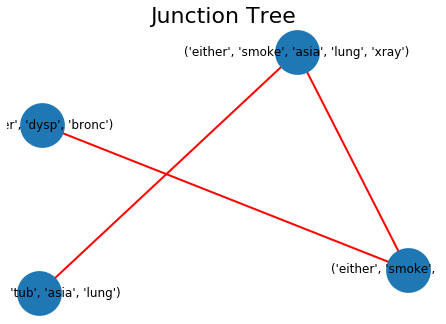

In [107]:
# Draw the junction tree of the network
junction_tree = triangulated_graph.to_junction_tree()

nx.draw(junction_tree, with_labels=True, node_size=2000, alpha=1, edge_color='r', width=2, nodeshape= 'square', vmin=1, vmax=0.8, linewidths= 0.1)
plt.title('Junction Tree', fontsize=22)

plt.draw()

###### Starting with the cliques as clusters, we arrange the clusters to form an undirected tree called junction tree, which satisfies the running intersection property. According to this property, if a node appears in two cliques/clusters, it should also appear in all the nodes on the path that connect the two cliques/clusters. For our constructed junction tree, we can see for any variable/node (e.g., 'either') which falls in this category follows this property. It appears in all the other nodes on the path which connects that two clusters.


# Task 2:

                        ################### Task 2 ###################

p(V ) = p(a)p(t | a)p(s)p(l | s)p(b | s)p(e | t, l)p(d | e, b)p(x | e)

The left side represents the joint probability of all random variables and it is the probability of every possible event as defined by the combination of the values of all the variables. Based on the number of events, the joint probaility distribution grows exponentially. Using the chain rule of probability and then applying the local independence consitions on our given network, the joint probaility becomes as shown above and we can clearly see that it is basically the product of all the CPDs in the given network.
The distribution of the terms between the junction tree clusters is done by variable elimination method. It follows the concept of marginalization over joint distibution and avoids computing the joint distribution by doing marginalization over much smaller factors. So, it basically compute the product of all the factors involving any variable and marginalize over them in case if that variable has to be eliminated. The same concept has been used in our chest clinical network as shown above. 

Message passing:
The message passing algorithm is all about passing messages between clusters. In the message passing algorithm, two clusters are connected by a Separation Set(sepset), which contains variables common to both clusters. Each cluster sends one message to each neighbor and the cluster by combining the local potential with the message, computes the marginal density of its variable. The message for the given chest network can be given as follows:
µ(t) = summation [p(a)p(t | a)]
& µ(e, l) = summation [p(e | t, l) * µ(t)]
The same approach can be followed to write out other message terms.

# Task 3:

In [108]:
# Gibbs sampling follow the MCMC method
from pgmpy.sampling import GibbsSampling

In [109]:
def GibbsModel(model):
    chest_inference = GibbsSampling(model)
    gen = chest_inference.generate_sample(size=2)
    return gen
    

In [110]:
GibbsModel(chest_Model)

<generator object GibbsSampling.generate_sample at 0x0000022D0C10CDC8>

References:
   [1] http://pgmpy.org/models.html
   [2] https://github.com/pgmpy/pgmpy/blob/dev/examples/Creating%20a%20Bayesian%20Network.ipynb
   [3] Book: Building Probabilistic Graphical Models with Python